In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import os


In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 

## Lets explore the dataset a little bit 

In [2]:
# Read the CSV file as a dataframe
df = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200328.txt', delimiter = ',')

In [3]:
#Lets combine the date and time into a single column
df['date_time'] = pd.to_datetime(df['DATE'] + ' ' + df['TIME'],infer_datetime_format=True)

In [4]:
df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,date_time
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2020,00:00:00,REGULAR,7411940,2515962,2020-03-21 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2020,04:00:00,REGULAR,7411942,2515966,2020-03-21 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2020,08:00:00,REGULAR,7411945,2515979,2020-03-21 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2020,12:00:00,REGULAR,7411969,2516000,2020-03-21 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2020,16:00:00,REGULAR,7412028,2516024,2020-03-21 16:00:00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2020,20:00:00,REGULAR,7412053,2516040,2020-03-21 20:00:00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/22/2020,00:00:00,REGULAR,7412067,2516049,2020-03-22 00:00:00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/22/2020,04:00:00,REGULAR,7412068,2516049,2020-03-22 04:00:00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/22/2020,08:00:00,REGULAR,7412071,2516059,2020-03-22 08:00:00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/22/2020,12:00:00,RECOVR AUD,7412086,2516073,2020-03-22 12:00:00


In [5]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               ',
       'date_time'],
      dtype='object')

In [107]:
df.STATION.value_counts()

34 ST-PENN STA     4218
FULTON ST          4032
GRD CNTRL-42 ST    3268
23 ST              3061
86 ST              2646
                   ... 
BRONX PARK EAST     123
182-183 STS         123
ALABAMA AV          123
SUTTER AV            84
CLEVELAND ST         84
Name: STATION, Length: 378, dtype: int64

In [9]:
# It looks like if we subtract the 5th row from the 1st row we get a count of how many people went to that 
#station that day

entries_diff = df.ENTRIES.iloc[6] - df.ENTRIES.iloc[0]
entries_diff

127

In [8]:
df.groupby(['SCP', 'STATION', 'LINENAME'])[['ENTRIES']].sum().sort_values(by=['ENTRIES'], ascending=False).head(10)

ENTRIES
SCP      STATION         LINENAME                 
01-00-03 14 ST           ACEL          89408108405
00-06-00 LAFAYETTE AV    C             88319564153
00-00-00 CANAL ST        JNQRZ6W       88151233501
02-00-03 COURT SQ        EMG           86798598975
00-00-02 CHAMBERS ST     123           86759249104
         BAYCHESTER AV   5             86685788080
00-00-00 3 AV 138 ST     6             85949950443
01-00-02 CARROLL ST      FG            85817852135
01-00-01 42 ST-PORT AUTH ACENQRS1237W  85427306816
02-00-00 23 ST           6             84006769070

In [10]:
#hourly Entries
hourly_entries = df.ENTRIES - df.ENTRIES.shift(1)
df['hourly_entries'] = hourly_entries.fillna(0)

In [11]:
df.groupby(['C/A', 'UNIT', 'STATION','date_time']).hourly_entries.first()

C/A    UNIT  STATION        date_time          
A002   R051  59 ST          2020-03-21 00:00:00     0.0
                            2020-03-21 04:00:00     2.0
                            2020-03-21 08:00:00     3.0
                            2020-03-21 12:00:00    24.0
                            2020-03-21 16:00:00    59.0
                                                   ... 
TRAM2  R469  RIT-ROOSEVELT  2020-03-27 05:00:00     0.0
                            2020-03-27 09:00:00    49.0
                            2020-03-27 13:00:00    30.0
                            2020-03-27 17:00:00    79.0
                            2020-03-27 21:00:00    45.0
Name: hourly_entries, Length: 43932, dtype: float64

In [12]:
#daily entries
df4 = df.groupby(['C/A', 'UNIT', 'STATION','DATE'])[['hourly_entries']].sum()

In [13]:
#remove small and large numbers
df4.loc[df4['hourly_entries']<0, 'hourly_entries'] = np.nan
df4.loc[df4['hourly_entries']>100000, 'hourly_entries'] = np.nan

In [14]:
df4.head(10)

hourly_entries
C/A  UNIT STATION    DATE                      
A002 R051 59 ST      03/21/2020             NaN
                     03/22/2020          1092.0
                     03/23/2020          1593.0
                     03/24/2020          1656.0
                     03/25/2020          1548.0
                     03/26/2020          1532.0
                     03/27/2020          1491.0
A006 R079 5 AV/59 ST 03/21/2020             NaN
                     03/22/2020           322.0
                     03/23/2020           644.0

In [16]:
# df4.groupby(['C/A', 'UNIT', 'STATION', 'DATE'])['hourly_entries'].plot(x='DATE', y='hourly_entries')

In [29]:
# This is the daily entries 
df_daily = (df.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE'], as_index=False).ENTRIES.first())

In [30]:
df_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,03/21/2020,7411940
1,A002,R051,02-00-00,59 ST,03/22/2020,7412067
2,A002,R051,02-00-00,59 ST,03/23/2020,7412160
3,A002,R051,02-00-00,59 ST,03/24/2020,7412298
4,A002,R051,02-00-00,59 ST,03/25/2020,7412433


In [31]:
df_daily[['PREV_DATE', 'PREV_ENTRIES']] = (df_daily.groupby(['C/A', 'UNIT', 'SCP', 'STATION'])['DATE', 'ENTRIES'].apply(lambda grp: grp.shift(1)))

In [32]:
df_daily

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,03/21/2020,7411940,NaN,NaN
1,A002,R051,02-00-00,59 ST,03/22/2020,7412067,03/21/2020,7411940.0
2,A002,R051,02-00-00,59 ST,03/23/2020,7412160,03/22/2020,7412067.0
3,A002,R051,02-00-00,59 ST,03/24/2020,7412298,03/23/2020,7412160.0
4,A002,R051,02-00-00,59 ST,03/25/2020,7412433,03/24/2020,7412298.0
...,...,...,...,...,...,...,...,...
34415,TRAM2,R469,00-05-01,RIT-ROOSEVELT,03/23/2020,5554,03/22/2020,5554.0
34416,TRAM2,R469,00-05-01,RIT-ROOSEVELT,03/24/2020,5554,03/23/2020,5554.0
34417,TRAM2,R469,00-05-01,RIT-ROOSEVELT,03/25/2020,5554,03/24/2020,5554.0
34418,TRAM2,R469,00-05-01,RIT-ROOSEVELT,03/26/2020,5554,03/25/2020,5554.0


In [34]:
# get a count of the entries by subtracting the entry from the previous entry
def get_daily_counts(row, max_counter):
    counter = row['ENTRIES'] - row['PREV_ENTRIES']
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        counter - min(row['ENTRIES'], row['PREV_ENTRIES'])
    if counter > max_counter:
        return 0
    return counter

df_daily['daily_entries'] = df_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

In [35]:
df_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,daily_entries
0,A002,R051,02-00-00,59 ST,03/21/2020,7411940,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,03/22/2020,7412067,03/21/2020,7411940.0,127.0
2,A002,R051,02-00-00,59 ST,03/23/2020,7412160,03/22/2020,7412067.0,93.0
3,A002,R051,02-00-00,59 ST,03/24/2020,7412298,03/23/2020,7412160.0,138.0
4,A002,R051,02-00-00,59 ST,03/25/2020,7412433,03/24/2020,7412298.0,135.0


In [36]:
# Take a look at a specific turntile
df_R051 = df_daily[(df_daily.UNIT=='R051')&(df_daily.SCP=='02-00-00')][['DATE','daily_entries']]
df_R051.head(10)

,DATE,daily_entries
0,03/21/2020,NaN
1,03/22/2020,127.0
2,03/23/2020,93.0
3,03/24/2020,138.0
4,03/25/2020,135.0
5,03/26/2020,109.0
6,03/27/2020,128.0


<Figure size 720x216 with 0 Axes>

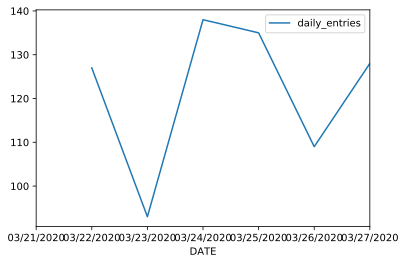

In [39]:
plt.figure(figsize=(10,3))
df_R051.plot('DATE', 'daily_entries')

In [41]:
#Get the sum of entries by day for each station

df_daily.groupby(['C/A', 'UNIT', 'STATION', 'DATE']).daily_entries.sum()

C/A    UNIT  STATION        DATE      
A002   R051  59 ST          03/21/2020       0.0
                            03/22/2020    1620.0
                            03/23/2020    1026.0
                            03/24/2020    1634.0
                            03/25/2020    1650.0
                                           ...  
TRAM2  R469  RIT-ROOSEVELT  03/23/2020     420.0
                            03/24/2020     287.0
                            03/25/2020     460.0
                            03/26/2020     370.0
                            03/27/2020     424.0
Name: daily_entries, Length: 5217, dtype: float64

In [44]:
#Get the sum of entries by day for each turnstile at each station
daily_sum = df_daily.groupby(['C/A','SCP', 'UNIT', 'STATION', 'DATE']).daily_entries.sum()
daily_sum
# type(daily_sum)

C/A    SCP       UNIT  STATION        DATE      
A002   02-00-00  R051  59 ST          03/21/2020      0.0
                                      03/22/2020    127.0
                                      03/23/2020     93.0
                                      03/24/2020    138.0
                                      03/25/2020    135.0
                                                    ...  
TRAM2  00-05-01  R469  RIT-ROOSEVELT  03/23/2020      0.0
                                      03/24/2020      0.0
                                      03/25/2020      0.0
                                      03/26/2020      0.0
                                      03/27/2020      0.0
Name: daily_entries, Length: 34420, dtype: float64

In [45]:
#making new column that sums 

df_daily['daily_sum'] = df_daily.groupby(['C/A', 'UNIT', 'STATION', 'DATE']).daily_entries.transform('sum')

In [46]:
df_daily.head(50)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,daily_entries,daily_sum
0,A002,R051,02-00-00,59 ST,03/21/2020,7411940,NaN,NaN,NaN,0.0
1,A002,R051,02-00-00,59 ST,03/22/2020,7412067,03/21/2020,7411940.0,127.0,1620.0
2,A002,R051,02-00-00,59 ST,03/23/2020,7412160,03/22/2020,7412067.0,93.0,1026.0
3,A002,R051,02-00-00,59 ST,03/24/2020,7412298,03/23/2020,7412160.0,138.0,1634.0
4,A002,R051,02-00-00,59 ST,03/25/2020,7412433,03/24/2020,7412298.0,135.0,1650.0
5,A002,R051,02-00-00,59 ST,03/26/2020,7412542,03/25/2020,7412433.0,109.0,1565.0
6,A002,R051,02-00-00,59 ST,03/27/2020,7412670,03/26/2020,7412542.0,128.0,1496.0
7,A002,R051,02-00-01,59 ST,03/21/2020,6588272,NaN,NaN,NaN,0.0
8,A002,R051,02-00-01,59 ST,03/22/2020,6588432,03/21/2020,6588272.0,160.0,1620.0
9,A002,R051,02-00-01,59 ST,03/23/2020,6588523,03/22/2020,6588432.0,91.0,1026.0


In [47]:
df_daily.groupby(['C/A', 'UNIT', 'STATION', 'DATE'])['daily_sum'].first()

C/A    UNIT  STATION        DATE      
A002   R051  59 ST          03/21/2020       0.0
                            03/22/2020    1620.0
                            03/23/2020    1026.0
                            03/24/2020    1634.0
                            03/25/2020    1650.0
                                           ...  
TRAM2  R469  RIT-ROOSEVELT  03/23/2020     420.0
                            03/24/2020     287.0
                            03/25/2020     460.0
                            03/26/2020     370.0
                            03/27/2020     424.0
Name: daily_sum, Length: 5217, dtype: float64

In [48]:
df_st59st = df_daily[(df_daily.STATION=='59 ST')&(df_daily.SCP=='02-00-00')][['DATE', 'daily_sum']]

<Figure size 720x216 with 0 Axes>

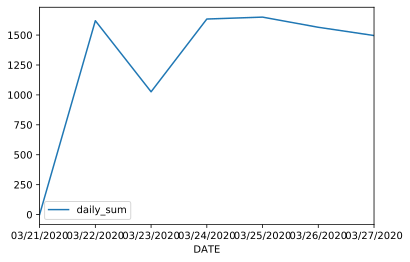

In [49]:
#7 plot daily time series of Station 59ST
plt.figure(figsize=(10,3))
df_st59st.plot('DATE', 'daily_sum')

In [58]:
#number of entries for each station
df_daily['station_daily'] = df_daily.groupby(['STATION', 'DATE']).daily_entries.transform('sum')

In [59]:
df_daily.head(10)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,daily_entries,daily_sum,station_daily
0,A002,R051,02-00-00,59 ST,03/21/2020,7411940,NaN,NaN,NaN,0.0,0.0
1,A002,R051,02-00-00,59 ST,03/22/2020,7412067,03/21/2020,7411940.0,127.0,1620.0,6938.0
2,A002,R051,02-00-00,59 ST,03/23/2020,7412160,03/22/2020,7412067.0,93.0,1026.0,4420.0
3,A002,R051,02-00-00,59 ST,03/24/2020,7412298,03/23/2020,7412160.0,138.0,1634.0,7511.0
4,A002,R051,02-00-00,59 ST,03/25/2020,7412433,03/24/2020,7412298.0,135.0,1650.0,7922.0
5,A002,R051,02-00-00,59 ST,03/26/2020,7412542,03/25/2020,7412433.0,109.0,1565.0,7366.0
6,A002,R051,02-00-00,59 ST,03/27/2020,7412670,03/26/2020,7412542.0,128.0,1496.0,7117.0
7,A002,R051,02-00-01,59 ST,03/21/2020,6588272,NaN,NaN,NaN,0.0,0.0
8,A002,R051,02-00-01,59 ST,03/22/2020,6588432,03/21/2020,6588272.0,160.0,1620.0,6938.0
9,A002,R051,02-00-01,59 ST,03/23/2020,6588523,03/22/2020,6588432.0,91.0,1026.0,4420.0


In [60]:
df7 = df_daily.groupby(['STATION','DATE'])['station_daily'].first()

In [61]:
df7.head

<bound method NDFrame.head of STATION    DATE      
1 AV       03/21/2020       0.0
           03/22/2020       9.0
           03/23/2020      16.0
           03/24/2020    2030.0
           03/25/2020    2274.0
                          ...  
ZEREGA AV  03/23/2020     311.0
           03/24/2020     536.0
           03/25/2020     544.0
           03/26/2020     535.0
           03/27/2020     486.0
Name: station_daily, Length: 2645, dtype: float64>

In [62]:
sta_59st = df7.loc[('59 ST'),:]

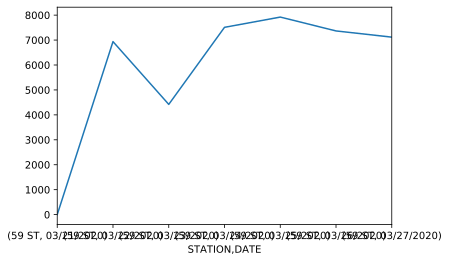

In [63]:
sta_59st.plot()

In [64]:
df7 = df_daily.groupby(['STATION','DATE'])['station_daily']

In [65]:
df7.first()

STATION    DATE      
1 AV       03/21/2020       0.0
           03/22/2020       9.0
           03/23/2020      16.0
           03/24/2020    2030.0
           03/25/2020    2274.0
                          ...  
ZEREGA AV  03/23/2020     311.0
           03/24/2020     536.0
           03/25/2020     544.0
           03/26/2020     535.0
           03/27/2020     486.0
Name: station_daily, Length: 2645, dtype: float64

In [71]:
#df with total daily entries for each station

top_sta = df_daily.groupby(['STATION'])['daily_entries'].sum().reset_index()

top_sta.head(10)

,STATION,daily_entries
0,1 AV,8591.0
1,103 ST,28596.0
2,103 ST-CORONA,24522.0
3,104 ST,4974.0
4,110 ST,11182.0
5,111 ST,19497.0
6,116 ST,34393.0
7,116 ST-COLUMBIA,4748.0
8,121 ST,3143.0
9,125 ST,88648.0


In [72]:
# list stations with most traffic
top_sta1 = top_sta.nlargest(10, ['daily_entries'])

In [69]:
top_sta1.head(10)

,STATION,daily_entries
68,42 ST-PORT AUTH,828092.0
61,34 ST-PENN STA,617784.0
207,EAST BROADWAY,600619.0
314,PATH NEW WTC,309866.0
213,EXCHANGE PLACE,303935.0
72,47-50 STS ROCK,184740.0
258,JOURNAL SQUARE,96725.0
9,125 ST,88648.0
110,86 ST,55611.0
233,GRD CNTRL-42 ST,54942.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

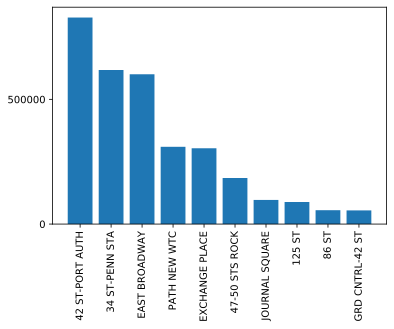

In [70]:
#plot of stations with most traffic.

plt.bar(top_sta1['STATION'], top_sta1['daily_entries'])
plt.rc('xtick', labelsize=200) 
plt.rc('ytick', labelsize=50)
plt.xticks(rotation=90)

In [207]:
type(top_sta)

pandas.core.frame.DataFrame